In [1]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Recommendation System
# Dataset : Books.CSV

In [2]:
# Importing libraries

import pandas as pd
import numpy as np

In [3]:
books_data = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Recommendation system\book.csv")
books_data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
books_df = books_data.rename({'User.ID':'userid','Book.Title':'booktitle','Book.Rating':'bookrating'},axis = 1)

In [5]:
books_df.head()

,Unnamed: 0,userid,booktitle,bookrating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [6]:
# Printing the book title and userid randomly
books_df['booktitle'] [2464]
books_df['userid'] [2464]

107

<AxesSubplot:title={'center':'Word Count Distribution for book title'}, ylabel='Frequency'>

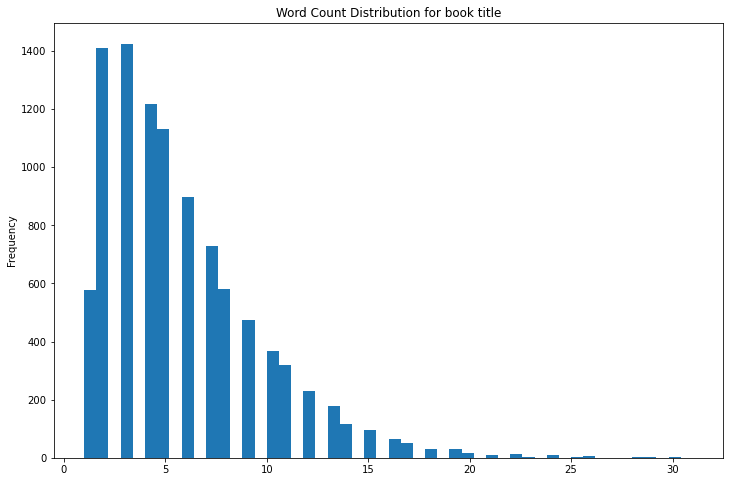

In [7]:
# Calculating the word count for book title
books_df['word_count'] = books_df['booktitle'].apply(lambda x: len(str(x).split()))# Plotting the word count
books_df['word_count'].plot( style = "darkgrid", kind='hist', bins = 50, figsize = (12,8), title='Word Count Distribution for book title')

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book title'}, xlabel='bigram'>

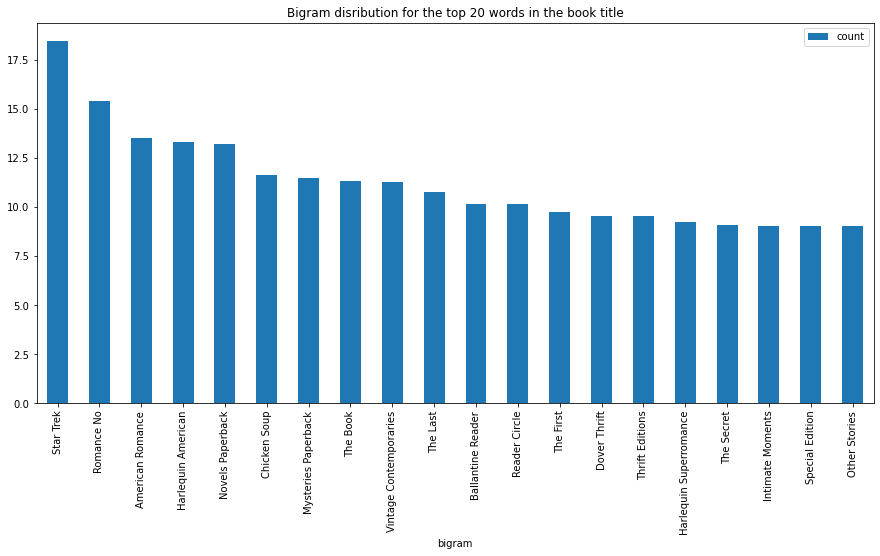

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(books_df['booktitle'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book title", figsize = (15,7), )

In [9]:
# Genre distribution
#books_df['booktitle'].value_counts().plot(x = 'booktitle', y ='bookrating', kind = 'bar', figsize = (10,5)  )

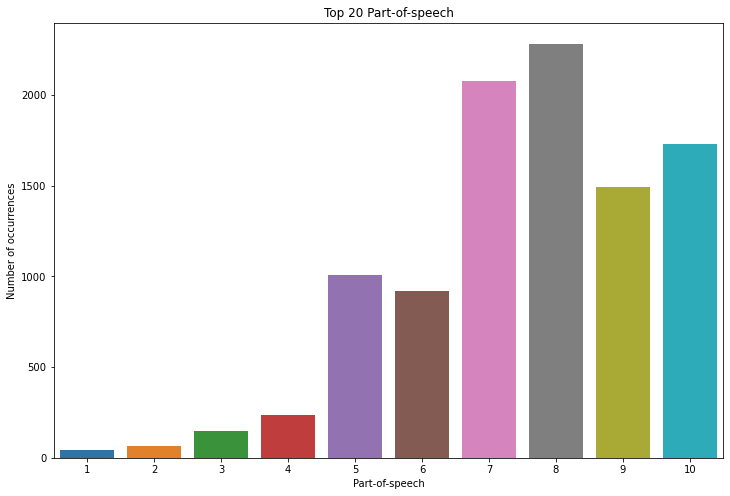

In [10]:
# Plot pos
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index', y='bookrating', data=books_df['bookrating'].value_counts()[:20].reset_index())
ax.set_title('Top 20 Part-of-speech')
ax.set_xlabel('Part-of-speech')
ax.set_ylabel('Number of occurrences')
plt.show()

In [11]:
books1 = books_df.drop(['Unnamed: 0'], axis = 1)

In [12]:
books1.head()

,userid,booktitle,bookrating,word_count
0,276726,Classical Mythology,5,2
1,276729,Clara Callan,3,2
2,276729,Decision in Normandy,6,3
3,276736,Flu: The Story of the Great Influenza Pandemic...,8,19
4,276737,The Mummies of Urumchi,6,4


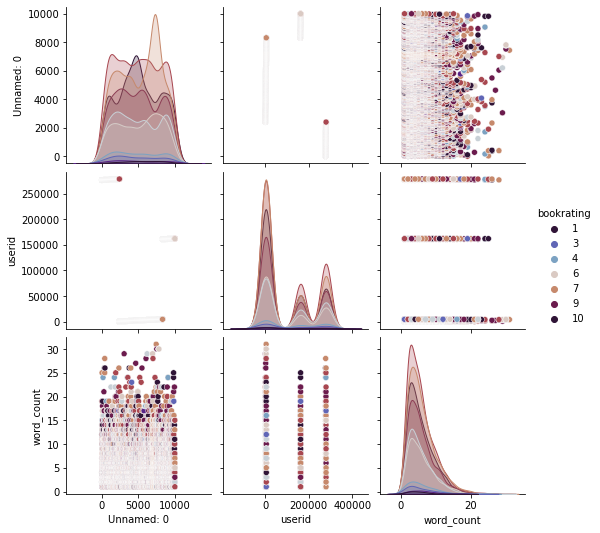

In [13]:
import seaborn as sns

sns.pairplot(data = books_df, hue = "bookrating", palette = "twilight_shifted" )

<AxesSubplot:title={'center':'BoxPlot With Books'}>

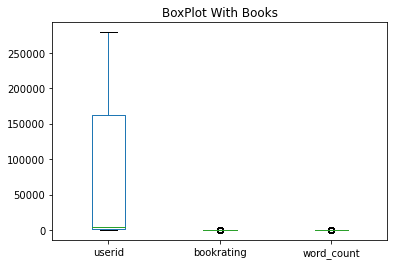

In [14]:
books1.plot.box(title = "BoxPlot With Books")

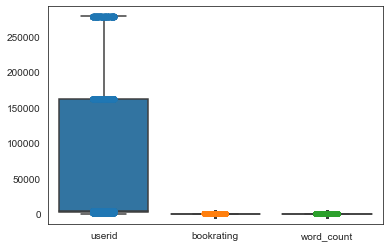

In [15]:
sns.set_style("white")
ax = sns.boxplot(data = books1)
ax = sns.stripplot(data = books1)

In [16]:
c = books_df["bookrating"].mean()
from IPython.display import display
display(c)

7.5663

<AxesSubplot:>

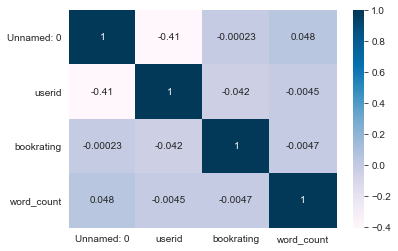

In [17]:
D = books_df.corr()
sns.heatmap(D, annot= True, cmap = "PuBu")

<AxesSubplot:xlabel='bookrating', ylabel='userid'>

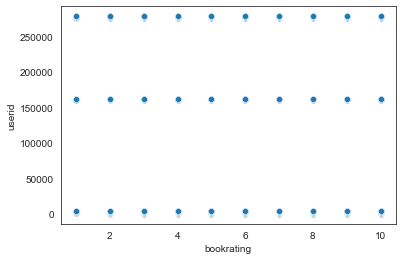

In [18]:
sns.scatterplot(x=books_df["bookrating"], y=books_df["userid"])

In [19]:
len(books1['userid'].unique())


2182

In [20]:
len(books1['booktitle'].unique())

9659

In [21]:
books_df1 = books1.pivot_table(index = 'userid', columns = 'booktitle', values = 'bookrating').reset_index(drop = True)

In [22]:
print(books1.shape)
print(books_df1.shape)


(10000, 4)
(2182, 9659)


In [23]:
books_df1.head()

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
books_df1.isnull().sum()

booktitle
 Jason, Madison &amp                                                       2181
 Other Stories;Merril;1985;McClelland &amp                                 2181
 Repairing PC Drives &amp                                                  2181
'48                                                                        2181
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      2181
                                                                           ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    2181
\Well, there's your problem\: Cartoons                                     2181
iI Paradiso Degli Orchi                                                    2181
stardust                                                                   2181
�?�?bermorgen.                                                             2181
Length: 9659, dtype: int64

In [25]:
books_df1.index = books1.userid.unique()

In [26]:
books_df1.fillna(0, inplace = True)

In [27]:
books_df1.head()

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
books_df1.values[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
books_df1.shape

(2182, 9659)

In [30]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import warnings
warnings.filterwarnings("ignore")
user_sim = 1 - pairwise_distances(books_df1.values, metric = 'cosine')

In [31]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df.iloc[0:5,0:5]    

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [33]:
user_sim_df.index = books1.userid.unique()
user_sim_df.columns = books1.userid.unique()

In [34]:
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [35]:
np.fill_diagonal(user_sim,0)

In [36]:
user_sim_df.idxmax(axis = 1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [37]:
books1[(books1['userid'] == 162107) | (books1['userid'] == 276726)]

,userid,booktitle,bookrating,word_count
0,276726,Classical Mythology,5,2
9987,162107,What's Bred in the Bone,7,5


In [38]:
books1[(books1['userid']==276729) | (books1['userid']==276726)]

,userid,booktitle,bookrating,word_count
0,276726,Classical Mythology,5,2
1,276729,Clara Callan,3,2
2,276729,Decision in Normandy,6,3


In [39]:
user_1 = books1[books1['userid'] == 276729]

In [40]:
user_2 = books1[books1['userid'] == 276726]

In [41]:
pd.merge(user_1,user_2, on = 'booktitle', how = 'outer')

,userid_x,booktitle,bookrating_x,word_count_x,userid_y,bookrating_y,word_count_y
0,276729.0,Clara Callan,3.0,2.0,NaN,NaN,NaN
1,276729.0,Decision in Normandy,6.0,3.0,NaN,NaN,NaN
2,NaN,Classical Mythology,NaN,NaN,276726.0,5.0,2.0


In [47]:
# Function for recommending books based on Book title. It takes book title and genre as an input.def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
data = books_df.loc[books_df['bookrating'] == bookrating]  
data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
indices = pd.Series(data.index, index = data['booktitle'])
    
    #Converting the book title into vectors and used bigram
tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
idx = indices[booktitle]# Get the pairwsie similarity scores 
sig = list(enumerate(sg[idx]))# Sort the books
sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
sig = sig[1:6]# Book indicies
movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
rec = data[['title', 'url']].iloc[movie_indices]
       
    # It reads the top 5 recommended book urls and print the images
    
for i in rec['url']:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content))
    plt.figure()
    print(plt.imshow(img))

SyntaxError: invalid syntax (<ipython-input-47-fb10aecf3f83>, line 4)

In [42]:
#recommend('The Adventures of Sherlock Holmes')